Neural network model to classify images of clothing, like sneakers and shirts.

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST Fashion data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
train_labels.dtype

dtype('uint8')

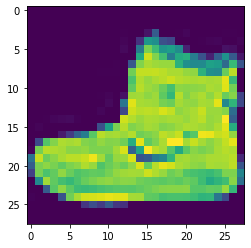

In [10]:
plt.imshow(train_images[0])

In [11]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

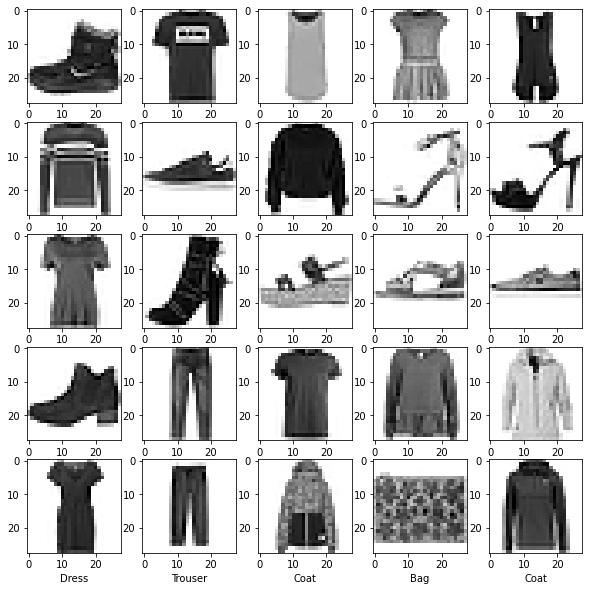

In [24]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the Model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [28]:
model.fit(
    train_images,
    train_labels,
    validation_split=0.3,
    epochs=10
)

Epoch 1/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5385 - accuracy: 0.8136 - val_loss: 0.4357 - val_accuracy: 0.8418
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3973 - accuracy: 0.8583 - val_loss: 0.3932 - val_accuracy: 0.8597
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8702 - val_loss: 0.3905 - val_accuracy: 0.8617
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3341 - accuracy: 0.8783 - val_loss: 0.3845 - val_accuracy: 0.8559
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3112 - accuracy: 0.8851 - val_loss: 0.3372 - val_accuracy: 0.8767
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2958 - accuracy: 0.8892 - val_loss: 0.3368 - val_accuracy: 0.8798
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2798 - accuracy: 0.8975 - val_loss: 0.3362 - val_accuracy:

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3678 - accuracy: 0.8750 - 190ms/epoch - 607us/step


In [35]:
img = np.expand_dims(test_images[0], 0)

In [36]:
img.shape

(1, 28, 28)

In [37]:
res = model.predict(img)

In [38]:
res

array([[-12.308109  , -12.902711  ,  -9.210371  , -12.642928  ,
        -11.019287  ,  -2.5607784 ,  -9.590966  ,   0.29332906,
         -8.085816  ,   2.861012  ]], dtype=float32)

In [39]:
res[0]

array([-12.308109  , -12.902711  ,  -9.210371  , -12.642928  ,
       -11.019287  ,  -2.5607784 ,  -9.590966  ,   0.29332906,
        -8.085816  ,   2.861012  ], dtype=float32)

In [40]:
np.argmax(res[0])

9

In [41]:
class_names[np.argmax(res[0])]

'Ankle boot'

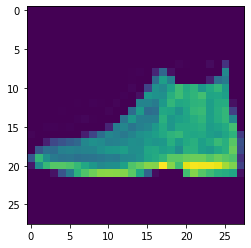

In [43]:
plt.imshow(test_images[0])